(100, 3)


"Donc pour passer d'un modèle linéaire de fonction f(x) = ax + b en modèle polynomiale de fonction f(x) = ax**2 + bx + c il suffit\njust de rajouter la ligne X = np.hstack((x**2, X)) ainsi que de modifier les dimensions de vecteur qui passe donc à (3, 1)"

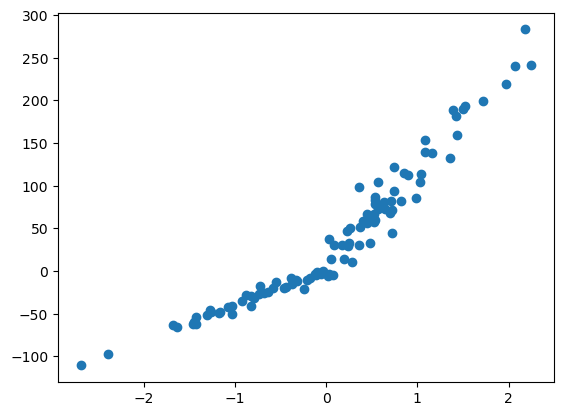

In [273]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
y = y + abs(y/2)
plt.scatter(x, y)
y = y.reshape(100, 1)
X = np.hstack((x, np.ones(x.shape)))
"""On rajoute une ligne X="""
X = np.hstack((x**2, X))
print(X.shape)
"""On change les dimensions du vecteur"""
theta = np.random.randn(3, 1)

"""Donc pour passer d'un modèle linéaire de fonction f(x) = ax + b en modèle polynomiale de fonction f(x) = ax**2 + bx + c il suffit
just de rajouter la ligne X = np.hstack((x**2, X)) ainsi que de modifier les dimensions de vecteur qui passe donc à (3, 1)"""

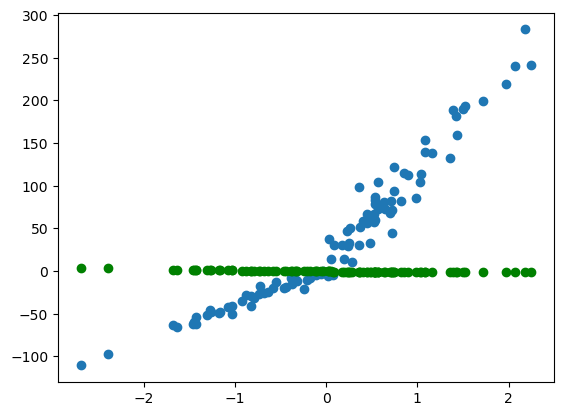

In [275]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c = 'g')

In [277]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y) **2)

In [279]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [281]:
def gradiant_descent(X, y, theta, learning_rate, n_iteration):

    cost_history = np.zeros(n_iteration)

    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

In [283]:
n_iteration = 1000
learning_rate = 0.01

theta_final, cost_history = gradiant_descent(X, y, theta, learning_rate, n_iteration)

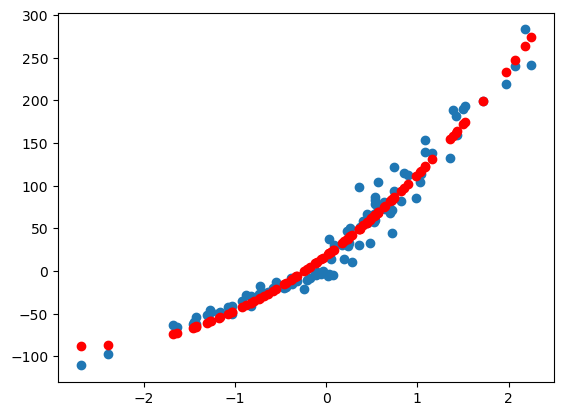

In [285]:
prediction = model(X, theta_final)

plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c = 'r')

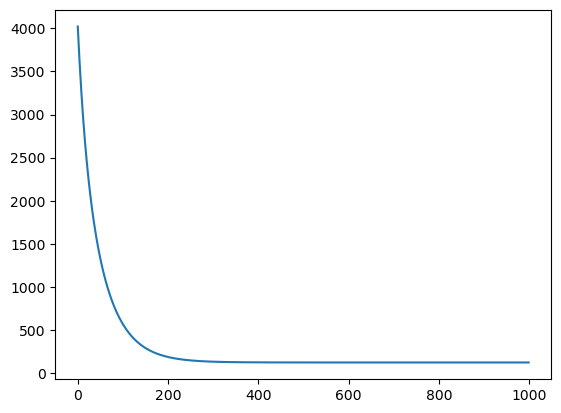

In [287]:
plt.plot(range(n_iteration), cost_history)

In [289]:
def coef_determinator(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [291]:
coef_determinator(y, prediction)

0.96290342743843